In [89]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [90]:
population = pd.read_excel('../data/05. population_raw_data.xlsx', header=1)
population.head()

population.isnull().any()

행정구역(동읍면)별(1)     True
행정구역(동읍면)별(2)     True
항목               False
계                False
20 - 24세         False
25 - 29세         False
30 - 34세         False
35 - 39세         False
65 - 69세         False
70 - 74세         False
75 - 79세         False
80 - 84세         False
85 - 89세         False
90 - 94세         False
95 - 99세         False
100+             False
dtype: bool

In [91]:
population.fillna(method='pad', inplace=True)
population.rename(columns ={"행정구역(동읍면)별(1)" : "광역시도",
                              "행정구역(동읍면)별(2)" : "시도",
                               "계" : "인구수"},inplace= True)
population= population[population['시도'] != '소계']
population

,광역시도,시도,항목,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,총인구수 (명),152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자인구수 (명),75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자인구수 (명),77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,총인구수 (명),125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자인구수 (명),62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,제주특별자치도,제주시,남자인구수 (명),235977.0,17377.0,13118.0,15084,18350.0,8474.0,6782.0,4941,2737.0,854.0,226.0,53,17.0
842,제주특별자치도,제주시,여자인구수 (명),234688.0,15261.0,12245.0,14687,18062.0,9265.0,7877.0,7178,5649.0,3122.0,1387.0,460,137.0
843,제주특별자치도,서귀포시,총인구수 (명),170932.0,10505.0,8067.0,9120,11606.0,8686.0,7460.0,6456,4521.0,1855.0,733.0,242,77.0
844,제주특별자치도,서귀포시,남자인구수 (명),86568.0,5600.0,4247.0,4693,6082.0,4237.0,3441.0,2611,1494.0,370.0,103.0,29,9.0


In [92]:
population.is_copy = False

C:\Users\B0103\Anaconda3\lib\site-packages\pandas\core\generic.py:5191: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\B0103\Anaconda3\lib\site-packages\pandas\core\generic.py:5192: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


In [93]:
population.rename(columns = {"항목":"구분"}, inplace=True)

population.loc[population['구분'] == '총인구수 (명)' , '구분'] = '합계'
population.loc[population['구분'] == '남자인구수 (명)' , '구분'] = '남자'
population.loc[population['구분'] == '여자인구수 (명)' , '구분'] = '여자'

population.head()

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0


## 인구 소멸위기 지역 계산하고 데이터 정리하기

In [94]:
population['20~39세'] = population['20 - 24세'] +  population['25 - 29세'] + population['30 - 34세'] +  population['35 - 39세']
population['65세 이상'] = population['65 - 69세'] +  population['70 - 74세'] + population['75 - 79세'] +  population['80 - 84세']+population['85 - 89세'] + population['90 - 94세'] + population['95 - 99세'] + population['100+']

In [95]:
population.head()

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,20~39세,65세 이상
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0,44333.0,24950.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0,22222.0,10895.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0,22111.0,14055.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0,38184.0,20388.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0,19347.0,8852.0


In [96]:
pop = pd.pivot_table(population,
                    index = ['광역시도', '시도'],
                    columns = ['구분'],
                    values = ['인구수', '20~39세', '65세 이상'])
pop.head()

20~39세                     65세 이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                              
구분              여자        합계  
광역시도 시도                       
강원도  강릉시  107615.0  213846.0  
     고성군   14215.0   30114.0  
     동해시   46131.0   93297.0  
     삼척시   34346.0   69599.0  
     속초시   41505.0   81793.0

In [97]:
pop['소멸비율'] = pop['20~39세','여자'] / (pop['65세 이상','합계']/2)
pop.head()

20~39세                     65세 이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                                  소멸비율  
구분              여자        합계            
광역시도 시도                                 
강원도  강릉시  107615.0  213846.0  1.226041  
     고성군   14215.0   30114.0  0.707314  
     동해시   46131.0   93297.0  1.289738  
     삼척시   34346.0   69599.0  0.973990  
     속초시   41505.0   81793.0  1.372647

In [98]:
pop['소멸위기지역'] = pop['소멸비율'] < 1.0
pop.head()

20~39세                     65세 이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                                  소멸비율 소멸위기지역  
구분              여자        합계                   
광역시도 시도                                        
강원도  강릉시  107615.0  213846.0  1.226041  False  
     고성군   14215.0   30114.0  0.707314   True  
     동해시   46131.0   93297.0  1.289738  False  
     삼척시   34346.0   69599.0  0.973990   True  
     속초시   41505.0   81793.0  1.372647  False

In [99]:
pop[pop['소멸위기지역']==True].index.get_level_values(1)

Index(['고성군', '삼척시', '양양군', '영월군', '정선군', '평창군', '홍천군', '횡성군', '가평군', '양평군',
       '연천군', '거창군', '고성군', '남해군', '밀양시', '산청군', '의령군', '창녕군', '하동군', '함안군',
       '함양군', '합천군', '고령군', '군위군', '문경시', '봉화군', '상주시', '성주군', '영덕군', '영양군',
       '영주시', '영천시', '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '동구', '영도구',
       '강화군', '옹진군', '강진군', '고흥군', '곡성군', '구례군', '담양군', '보성군', '신안군', '영광군',
       '영암군', '완도군', '장성군', '장흥군', '진도군', '함평군', '해남군', '화순군', '고창군', '김제시',
       '남원시', '무주군', '부안군', '순창군', '임실군', '장수군', '정읍시', '진안군', '공주시', '금산군',
       '논산시', '보령시', '부여군', '서천군', '예산군', '청양군', '태안군', '홍성군', '괴산군', '단양군',
       '보은군', '영동군', '옥천군'],
      dtype='object', name='시도')

In [100]:
len(pop[pop['소멸위기지역']==True].index.get_level_values(1))

83

In [101]:
pop.reset_index(inplace=True)
pop.head()

광역시도   시도   20~39세                     65세 이상                         인구수  \
구분                 남자       여자       합계       남자       여자       합계        남자   
0   강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
1   강원도  고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
2   강원도  동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
3   강원도  삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
4   강원도  속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                            소멸비율 소멸위기지역  
구분        여자        합계                   
0   107615.0  213846.0  1.226041  False  
1    14215.0   30114.0  0.707314   True  
2    46131.0   93297.0  1.289738  False  
3    34346.0   69599.0  0.973990   True  
4    41505.0   81793.0  1.372647  False

In [102]:
temp_columns = [pop.columns.get_level_values(0)[n] + pop.columns.get_level_values(1)[n]
                for n in range(0, len(pop.columns.get_level_values(0)))]

pop.columns = temp_columns

pop.head()


,광역시도,시도,20~39세남자,20~39세여자,20~39세합계,65세 이상남자,65세 이상여자,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,True
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,False


In [103]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
광역시도        264 non-null object
시도          264 non-null object
20~39세남자    264 non-null float64
20~39세여자    264 non-null float64
20~39세합계    264 non-null float64
65세 이상남자    264 non-null float64
65세 이상여자    264 non-null float64
65세 이상합계    264 non-null float64
인구수남자       264 non-null float64
인구수여자       264 non-null float64
인구수합계       264 non-null float64
소멸비율        264 non-null float64
소멸위기지역      264 non-null bool
dtypes: bool(1), float64(10), object(2)
memory usage: 25.1+ KB


## 대한민국 지도 그리는 방법에 대한 소개

이미 Folium은 우리가 사용할 줄 아는 모듈이다. 그러나 Folium에도 접근하기 어려운 부분이 있다. 바로 경께선을 그려주는 json파일을 구하는것이 어렵다!
https://goo.gl/si5pKD 로 접속을 하면 json파일을 얻을 수 있다.

In [104]:
pop['시도'].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '권선구', '기흥구',
       '김포시', '남양주시', '단원구', '덕양구', '동두천시', '동안구', '만안구', '부천시', '분당구',
       '상록구', '성남시', '소사구', '수원시', '수정구', '수지구', '시흥시', '안산시', '안성시',
       '안양시', '양주시', '양평군', '여주시', '연천군', '영통구', '오산시', '오정구', '용인시',
       '원미구', '의왕시', '의정부시', '이천시', '일산동구', '일산서구', '장안구', '중원구', '처인구',
       '파주시', '팔달구', '평택시', '포천시', '하남시', '화성시', '거제시', '거창군', '김해시',
       '남해군', '마산합포구', '마산회원구', '밀양시', '사천시', '산청군', '성산구', '양산시', '의령군',
       '의창구', '진주시', '진해구', '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군',
       '합천군', '경산시', '경주시', '고령군', '구미시', '군위군', '김천시', '남구', '문경시',
       '봉화군', '북구', '상주시', '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시',
       '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시', '광산구',
       '동구', '서구', '달서구', '달성군', '수성구', '중구', '대덕구', '유성구', '강서구', '금정구',
       '기

In [105]:
si_name = [None] * len(pop)
temp_gu_dict = {'수원':['장안구', '권선구', '팔달구', '영통구'], 
                       '성남':['수정구', '중원구', '분당구'], 
                       '안양':['만안구', '동안구'], 
                       '안산':['상록구', '단원구'], 
                       '고양':['덕양구', '일산동구', '일산서구'], 
                       '용인':['처인구', '기흥구', '수지구'], 
                       '청주':['상당구', '서원구', '흥덕구', '청원구'], 
                       '천안':['동남구', '서북구'], 
                       '전주':['완산구', '덕진구'], 
                       '포항':['남구', '북구'], 
                       '창원':['의창구', '성산구', '진해구', '마산합포구', '마산회원구'], 
                       '부천':['오정구', '원미구', '소사구']}

In [106]:
pop.head()

,광역시도,시도,20~39세남자,20~39세여자,20~39세합계,65세 이상남자,65세 이상여자,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,True
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,False


In [107]:
for n in pop.index:
    if pop['광역시도'][n][-3:] not in ['광역시', '특별시', '자치시']:
        if pop['시도'][n][:-1]=='고성' and pop['광역시도'][n] =='강원도':
            si_name[n] = '고성(강원)'
        elif pop['시도'][n][:-1]=='고성' and pop['광역시도'][n] == '경상남도':
            si_name[n] = '고성(경남)'
        else:
            si_name[n] = pop['시도'][n][:-1]
        
        for keys, values in temp_gu_dict.items():
            if pop['시도'][n] in values:
                if len(pop['시도'][n])==2:
                    si_name[n] = keys + ' ' + pop['시도'][n]
                elif pop['시도'][n] in ['마산합포구','마산회원구']:
                    si_name[n] = keys + ' ' + pop['시도'][n][2:-1]
                else:
                    si_name[n] = keys + ' ' + pop['시도'][n][:-1]
        
    elif pop['광역시도'][n] == '세종특별자치시':
            si_name[n] = '세종'
            
    else:
        if len(pop['시도'][n]) ==2:
            si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시도'][n]
        else:
            si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시도'][n][:-1]
        

In [108]:
si_name

['강릉',
 '고성(강원)',
 '동해',
 '삼척',
 '속초',
 '양구',
 '양양',
 '영월',
 '원주',
 '인제',
 '정선',
 '철원',
 '춘천',
 '태백',
 '평창',
 '홍천',
 '화천',
 '횡성',
 '가평',
 '고양',
 '과천',
 '광명',
 '광주',
 '구리',
 '군포',
 '수원 권선',
 '용인 기흥',
 '김포',
 '남양주',
 '안산 단원',
 '고양 덕양',
 '동두천',
 '안양 동안',
 '안양 만안',
 '부천',
 '성남 분당',
 '안산 상록',
 '성남',
 '부천 소사',
 '수원',
 '성남 수정',
 '용인 수지',
 '시흥',
 '안산',
 '안성',
 '안양',
 '양주',
 '양평',
 '여주',
 '연천',
 '수원 영통',
 '오산',
 '부천 오정',
 '용인',
 '부천 원미',
 '의왕',
 '의정부',
 '이천',
 '고양 일산동',
 '고양 일산서',
 '수원 장안',
 '성남 중원',
 '용인 처인',
 '파주',
 '수원 팔달',
 '평택',
 '포천',
 '하남',
 '화성',
 '거제',
 '거창',
 '고성(경남)',
 '김해',
 '남해',
 '창원 합포',
 '창원 회원',
 '밀양',
 '사천',
 '산청',
 '창원 성산',
 '양산',
 '의령',
 '창원 의창',
 '진주',
 '창원 진해',
 '창녕',
 '창원',
 '통영',
 '하동',
 '함안',
 '함양',
 '합천',
 '경산',
 '경주',
 '고령',
 '구미',
 '군위',
 '김천',
 '포항 남구',
 '문경',
 '봉화',
 '포항 북구',
 '상주',
 '성주',
 '안동',
 '영덕',
 '영양',
 '영주',
 '영천',
 '예천',
 '울릉',
 '울진',
 '의성',
 '청도',
 '청송',
 '칠곡',
 '포항',
 '광주 광산',
 '광주 남구',
 '광주 동구',
 '광주 북구',
 '광주 서구',
 '대구 남구',
 '대구 달서',
 '대구 달성',
 '대구 동구

In [109]:
pop['ID'] = si_name
pop.head()

,광역시도,시도,20~39세남자,20~39세여자,20~39세합계,65세 이상남자,65세 이상여자,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원)
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초


In [110]:
del pop['20~39세남자']
del pop['65세 이상남자']
del pop['65세 이상여자']

In [111]:
pop.head()

,광역시도,시도,20~39세여자,20~39세합계,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원)
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초


In [121]:
draw_korea_raw = pd.read_excel('../data/05. draw_korea_raw.xlsx', encoding="EUC-KR")
draw_korea_raw.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천 소사,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN


In [118]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked

0
0  7       철원
   8       화천
   9       양구
   10  고성(강원)
1  3       양주
...       ...
24 2       장흥
   3       보성
25 2       완도
   5       제주
26 5      서귀포

[252 rows x 1 columns]

In [119]:
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked

,level_0,level_1,0
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
247,24,2,장흥
248,24,3,보성
249,25,2,완도
250,25,5,제주


In [120]:
draw_korea_raw_stacked.rename(columns={'level_0':'y', 'level_1':'x', 0:'ID'},inplace =True)
draw_korea_raw_stacked

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
247,24,2,장흥
248,24,3,보성
249,25,2,완도
250,25,5,제주


In [122]:
draw_korea = draw_korea_raw_stacked

In [124]:

BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
#     [(9,14), (9,15)], 
    [(27,5), (27,6), (25,6)],
]

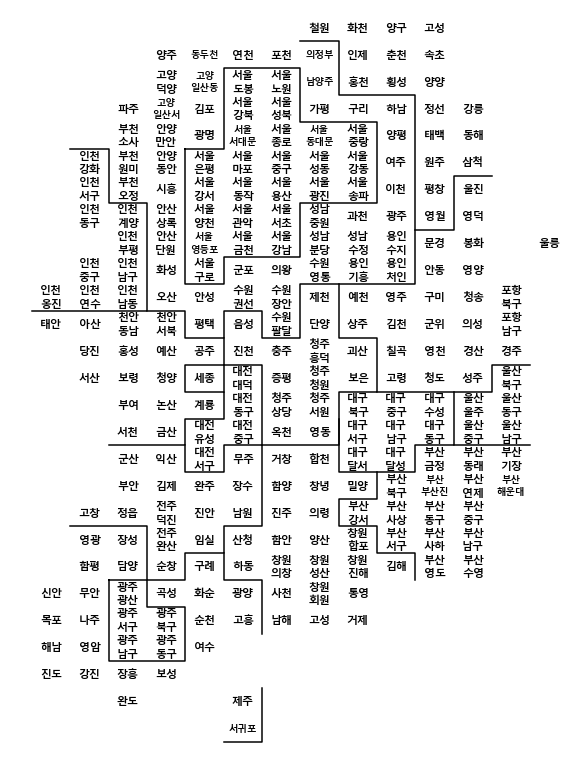

In [125]:
plt.figure(figsize=(8, 11))

# 지역 이름 표시
for idx, row in draw_korea.iterrows():
    
    # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
    # (중구, 서구)
    if len(row['ID'].split())==2:
        dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
    elif row['ID'][:2]=='고성':
        dispname = '고성'
    else:
        dispname = row['ID']

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도 경계 그린다.
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

In [127]:
temp_list = list(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

for tmp in temp_list:
    pop = pop.drop(pop[pop['ID']==tmp].index)

print(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))
set()

set()


set()

In [128]:
pop = pd.merge(pop, draw_korea, how='left', on=['ID'])
pop.head()

,광역시도,시도,20~39세여자,20~39세합계,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉,3,11
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원),0,10
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해,4,11
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척,5,11
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초,1,10


In [129]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - 
                                     min(blockedMap[targetData]))*0.25 + \
                                                                min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

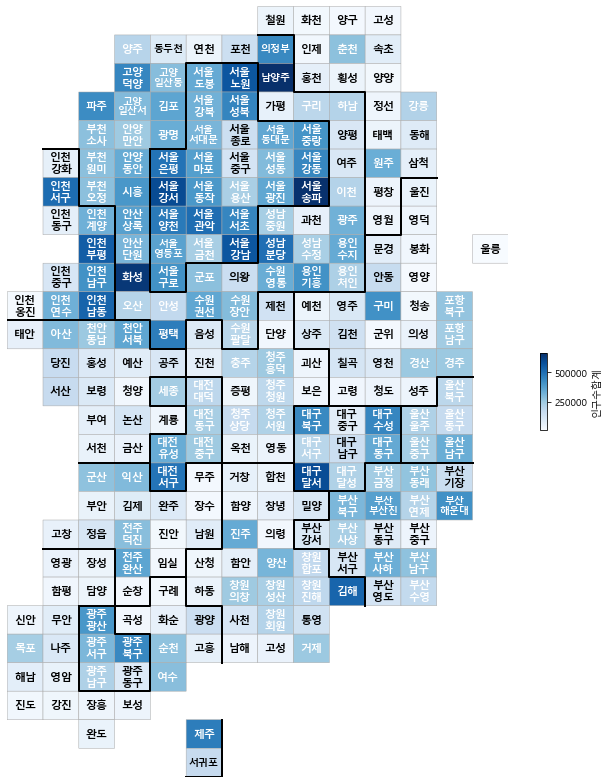

In [134]:
drawKorea('인구수합계', pop, 'Blues')

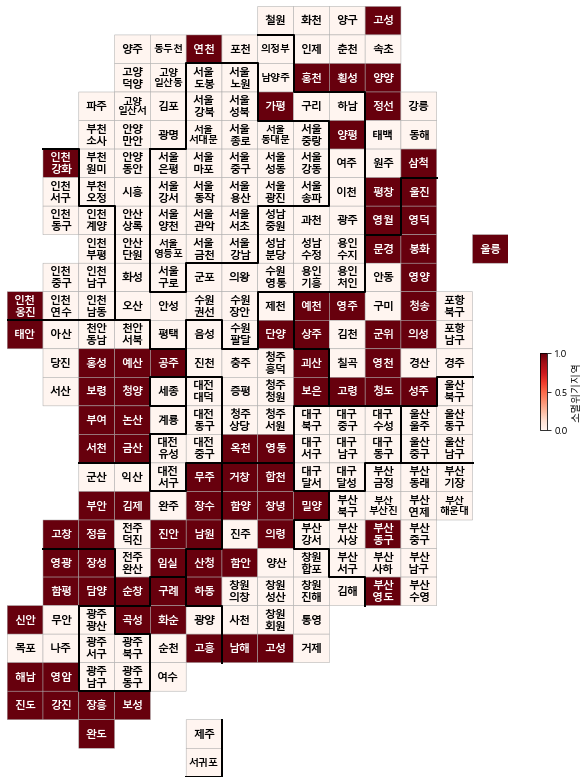

In [135]:
pop['소멸위기지역'] = [1 if con else 0 for con in pop['소멸위기지역']]
drawKorea('소멸위기지역', pop, 'Reds')

In [136]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = 20.

    datalabel = targetData

    tmp_max = max([ np.abs(min(blockedMap[targetData])), 
                                  np.abs(max(blockedMap[targetData]))])
    vmin, vmax = -tmp_max, tmp_max

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if np.abs(row[targetData]) > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()


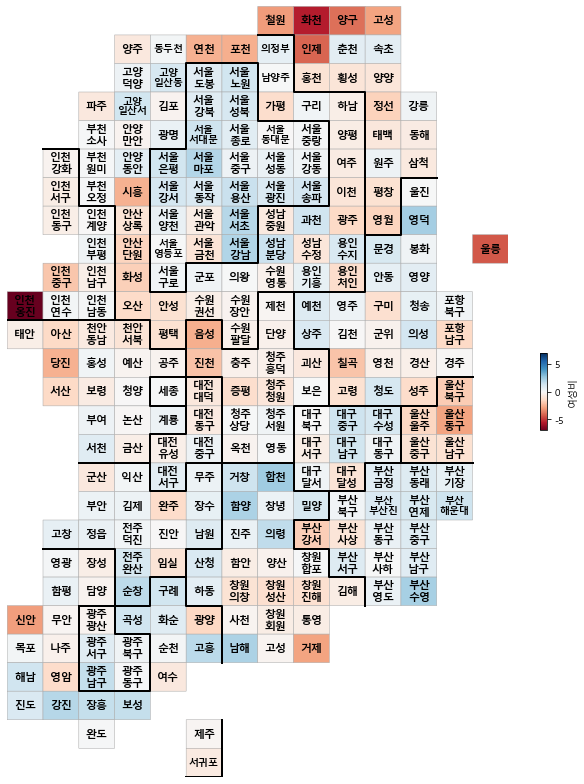

In [137]:
pop['여성비'] = (pop['인구수여자']/pop['인구수합계'] - 0.5)*100
drawKorea('여성비', pop, 'RdBu')

## Folium에서 인구 소멸 위기 지역 표기하기

In [138]:
pop_folium = pop.set_index("ID")
pop_folium.head()

,광역시도,시도,20~39세여자,20~39세합계,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,y,x,여성비
ID,,,,,,,,,,,,,
강릉,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,0,3,11,0.323597
고성(강원),강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,1,0,10,-2.796042
동해,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,0,4,11,-0.554680
삼척,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,1,5,11,-0.651590
속초,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,0,1,10,0.743951


In [139]:
import folium
import json
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [144]:
geo_path = '../data/05. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location = [36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_str,
              data = pop_folium['인구수합계'],
              columns = [pop_folium.index, pop_folium['인구수합계']],
              fill_color ='YlGnBu',
              key_on ='feature.id')
map

In [145]:
map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_str,
               data = pop_folium['소멸위기지역'],
               columns = [pop_folium.index, pop_folium['소멸위기지역']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

In [151]:
draw_korea.to_csv("../data/05. draw_korea.csv", encoding='utf-8', sep=',')

In [147]:
draw_korea

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
247,24,2,장흥
248,24,3,보성
249,25,2,완도
250,25,5,제주
